In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding1998/startup_funding.csv


In [7]:
df=pd.read_csv("/kaggle/input/indian-startup-funding1998/startup_funding.csv")
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [13]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [14]:
df["Startup Name"].unique

<bound method Series.unique of 0                             BYJU’S
1                             Shuttl
2                          Mamaearth
3       https://www.wealthbucket.in/
4                             Fashor
                    ...             
3039                      Printvenue
3040                        Graphene
3041                  Mad Street Den
3042                       Simplotel
3043                couponmachine.in
Name: Startup Name, Length: 3044, dtype: object>

In [15]:
df["Startup Name"].unique().shape

(2459,)

In [16]:
df(["Startup Name"].unique().tolist())# convert to the list


AttributeError: 'list' object has no attribute 'unique'

In [17]:
df["Investors Name"]=df["Investors Name"].fillna("Undisclosed") # fillna means remove na value error

In [18]:
sorted(df["Investors Name"].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

In [5]:
df.info

<bound method DataFrame.info of       Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
3039   3040      29/01/2015                    Printvenue   
3040   3041      29/01/2015                      Graphene   
3041   3042      30/01/2015                Mad Street Den   
3042   3043      30/01/2015                     Simplotel   
3043   3044      31/01/2015              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Reta

In [125]:
df.drop(columns=["Remarks"],inplace=True)  # inplace true permanent change master data 
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [126]:
df.set_index("Sr No",inplace=True)
df


,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"


In [19]:

df


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [20]:
df .rename(columns={
    "Date dd/mm/yyyy":"date",
    "Startup Name":"startup",
    "Industry Vertical":"vertical",
    "SubVertical":"subvertical",
    "City  Location":"city",
    "Investors Name":"Investors",
    "InvestmentType":"round",
    "Amount in USD":"amount"
},inplace=True)

In [21]:
df["amount"]=df["amount"].fillna("0")  # fillna remove all missing value and replace 0 

In [22]:
df["amount"].astype("int")  # we can replace due to comma firstly remove comma

ValueError: invalid literal for int() with base 10: '20,00,00,000'

In [23]:
df["amount"]=df["amount"].str.replace(",","")

In [24]:
df["amount"]=df["amount"].str.replace("undisclosed","0")
df["amount"]=df["amount"].str.replace("unknown","0")

In [25]:
 df=df[df["amount"].str.isdigit()]  # only give the digit number 

In [26]:
df["amount"]=df["amount"].astype("float")

/tmp/ipykernel_36/347941321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount"]=df["amount"].astype("float")


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3026 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sr No            3026 non-null   int64  
 1   date             3026 non-null   object 
 2   startup          3026 non-null   object 
 3   vertical         2855 non-null   object 
 4   subvertical      2101 non-null   object 
 5   city             2846 non-null   object 
 6   Investors        3026 non-null   object 
 7   InvestmentnType  3024 non-null   object 
 8   amount           3026 non-null   float64
 9   Remarks          415 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 260.0+ KB


In [28]:
df.head()

,Sr No,date,startup,vertical,subvertical,city,Investors,InvestmentnType,amount,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN


In [29]:
def to_inr(dollar):
    inr=dollar*87.65
    return inr/10000000

In [30]:
df["amount"]=df["amount"].apply(to_inr) # apply function apply the function convert to dollor 

/tmp/ipykernel_36/881053729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount"]=df["amount"].apply(to_inr) # apply function apply the function convert to dollor


In [140]:
df["amount"]

Sr No
1       1753.000000
2         70.544173
3        160.915408
4         26.295000
5         15.777000
           ...     
3040      39.442500
3041       7.231125
3042      13.147500
3043       0.000000
3044       1.227100
Name: amount, Length: 3026, dtype: float64

In [31]:
df.head()

,Sr No,date,startup,vertical,subvertical,city,Investors,InvestmentnType,amount,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1753.000000,NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,70.544173,NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,160.915408,NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.295000,NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.777000,NaN


In [32]:
df["date"]=pd.to_datetime(df["date"],errors="coerce") # ignore the value  unable to convert

/tmp/ipykernel_36/2116732305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"]=pd.to_datetime(df["date"],errors="coerce") # ignore the value  unable to convert


In [33]:
df.head()


,Sr No,date,startup,vertical,subvertical,city,Investors,InvestmentnType,amount,Remarks
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1753.000000,NaN
1,2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,70.544173,NaN
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,160.915408,NaN
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.295000,NaN
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.777000,NaN


In [34]:
df.info

<bound method DataFrame.info of       Sr No       date                       startup             vertical  \
0         1 2020-09-01                        BYJU’S               E-Tech   
1         2        NaT                        Shuttl       Transportation   
2         3 2020-09-01                     Mamaearth           E-commerce   
3         4 2020-02-01  https://www.wealthbucket.in/              FinTech   
4         5 2020-02-01                        Fashor  Fashion and Apparel   
...     ...        ...                           ...                  ...   
3039   3040        NaT                    Printvenue                  NaN   
3040   3041        NaT                      Graphene                  NaN   
3041   3042        NaT                Mad Street Den                  NaN   
3042   3043        NaT                     Simplotel                  NaN   
3043   3044        NaT              couponmachine.in                  NaN   

                                subvertical

In [35]:
df["date"].dt.month # that's why convert find out the specefic data like month , year,days

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0       9.0
1       NaN
2       9.0
3       2.0
4       2.0
       ... 
3039    NaN
3040    NaN
3041    NaN
3042    NaN
3043    NaN
Name: date, Length: 3026, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3026 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Sr No            3026 non-null   int64         
 1   date             1282 non-null   datetime64[ns]
 2   startup          3026 non-null   object        
 3   vertical         2855 non-null   object        
 4   subvertical      2101 non-null   object        
 5   city             2846 non-null   object        
 6   Investors        3026 non-null   object        
 7   InvestmentnType  3024 non-null   object        
 8   amount           3026 non-null   float64       
 9   Remarks          415 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 260.0+ KB


In [37]:
df=df.dropna(subset=["date","startup","vertical","city","Investors","amount"]) #  remove missing  value 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1214 entries, 0 to 2828
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Sr No            1214 non-null   int64         
 1   date             1214 non-null   datetime64[ns]
 2   startup          1214 non-null   object        
 3   vertical         1214 non-null   object        
 4   subvertical      897 non-null    object        
 5   city             1214 non-null   object        
 6   Investors        1214 non-null   object        
 7   InvestmentnType  1214 non-null   object        
 8   amount           1214 non-null   float64       
 9   Remarks          154 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 104.3+ KB


In [39]:
df.to_csv("startup_cleaned.csv",index=False) # index false means  export the data 

In [40]:
df["Investors"].str.split(",")  # break  , seperated 

0                               [Tiger Global Management]
2                                 [Sequoia Capital India]
3                                        [Vinod Khatumal]
4                               [Sprout Venture Partners]
6                                         [Ant Financial]
                              ...                        
2824    [Sequoia Capital,  TR Capital,  Steadview Capi...
2825             [Matrix Partners India,  India Quotient]
2826    [Helion Venture Partner,  Powerhouse Ventures,...
2827                                   [Unitus Seed Fund]
2828                                  [Info Edge (India)]
Name: Investors, Length: 1214, dtype: object

In [41]:
df["Investors"].str.split(",").sum() # for merging list

['Tiger Global Management',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels',
 ' Ravikanth Reddy',
 'Manipal Education and Medical Group (MEMG)',
 'Dream Incubator',
 'Startup Buddy',
 'Lightbox',
 'Altimeter Capital',
 ' DST Global',
 'Matrix Partners India',
 ' Sequoia India',
 'SAIF Partners',
 'TIW Private Equity',
 'Exfinity Venture Partners',
 'Breakthrough Energy Ventures',
 'Endiya Partners',
 'A91 Partners',
 'Bennett Coleman and Company Ltd (BCCL)',
 'India Quotient',
 ' Axilor Ventures',
 'SC GG India Mobility Holdings LLC',
 'Sequoia India',
 'Undisclosed',
 'Azim Premji',
 ' Binny Bansal',
 'Pine Labs Pte Ltd',
 'Naspers',
 'Lok Capital',
 ' IIFL Wealth',
 'WaterBridge Ventures',
 'Kapil Dev',
 'DIG Investment Ab',
 ' Deshe Holdings',
 ' Samih Toukan and Hussam Khoury',
 'March Capital Partners',
 'Artha Venture',
 'Qatar Investment Authority',
 'Compo

In [152]:
len(df["Investors"].str.split(",").sum()) # for merging list

2357

In [153]:
len(set(df["Investors"].str.split(",").sum())) # for merging list

1698

In [154]:
sorted(set(df["Investors"].str.split(",").sum()))

['',
 ' & Others',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 91springboard',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhinav Patodia',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Accel India',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners and G Raghunandan',
 ' Accel Partners and IDG Ventures',
 ' Accel Partners and Saama Capital',
 ' Accion',
 ' Adam D\\\\xe2\\\\x80\\\\x99Angelo',
 ' Aditya Agarwal',
 ' Aditya Aggarwal',
 ' Aditya Malik & Others',
 ' Aditya Vazirani',
 ' AdvantEdge Partners',
 ' Adveq Management',
 ' Aijaz Saleem',
 ' Ajay Bhatia',
 ' Ajeet Khurana & others',
 ' Akatsuki and Incubate Fund from Japan and Better Capital AngelList syndicate.',
 ' Alfa Capital',
 ' Alok Divatia',
 ' Alok Mittal',
 ' Alok Sharma',
 ' Aloke Bajp

In [ ]:
#  download the data in  output 

In [155]:
df[df["Investors"].str.contains("IDG Ventures")].head()

,date,startup,vertical,subvertical,city,Investors,InvestmentnType,amount
Sr No,,,,,,,,
259,2018-02-05,Bizongo,Consumer Internet,Aggregator For Packaging Material,Mumbai,"B Capital, International Finance Corporation (...",Private Equity,192.8300
439,2017-07-12,eShakti,Ecommerce,"""Women\\'s Fashion Clothing Online Platform""",Chennai,IDG Ventures,Debt Funding,20.1595
478,2017-04-11,Hevo Data,Technology,Real time data analytics & reporting,Bangalore,IDG Ventures India,Private Equity,8.7650
479,2017-06-11,Smart Karma,Technology,Financial Technology Research Platform,Bangalore,IDG Ventures India,Private Equity,0.0000
490,2017-09-11,Mobiliz AR,Technology,Augmented Reality based Tech platform,Bangalore,"IDG Ventures, IDFC-Parampara Fund",Private Equity,0.0000


In [42]:
df[df["Investors"].str.contains("Investors")][["date","startup","vertical","city","amount"]].head()

,date,startup,vertical,city,amount
73,2019-08-07,Board Infinity,EdTech,Chembur,2.801338
121,2018-02-12,Guiddoo,Travel Tech,Mumbai,7.012000
122,2018-02-12,Career Anna,Online Education,Gurugram,5.013580
125,2018-06-12,BuildSupply,"SaaS, Ecommerce",Gurugram,30.677500
432,2017-05-12,Mobycy,Technology,Gurgaon,4.382500


In [ ]:
# find out biggest investement

In [43]:
df[df["Investors"].str.contains("IDG Ventures")].groupby("startup")

In [45]:
df[df["Investors"].str.contains("IDG Ventures")].groupby("startup")["amount"].sum().sort_values(ascending=False)


startup
Lenskart                 525.90000
Bizongo                  219.12500
Curefit                  131.47500
Fintellix                131.47500
Xpressbees               109.56250
FirstCry.com              87.65000
HealthifyMe               52.59000
Blowhorn                  31.99225
eShakti                   20.15950
POPxo.com                 17.53000
Uniphore                  17.53000
Hansel.io                 11.83275
Little Black Book          8.76500
Cloudcherry Analytics      8.76500
Hevo Data                  8.76500
CityFlo                    6.57375
Mobiliz AR                 0.00000
Smart Karma                0.00000
Tripoto                    0.00000
Unbxd                      0.00000
Name: amount, dtype: float64

In [ ]:
df[df["Investors"].str.contains("IDG Ventures")]["vertical"].plot(kind="pie")

<Axes: ylabel='amount'>

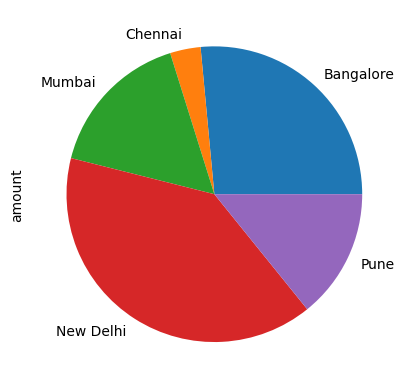

In [57]:
df[df["Investors"].str.contains("IDG Ventures")].groupby("city")["amount"].sum().plot(kind="pie")

<Axes: ylabel='amount'>

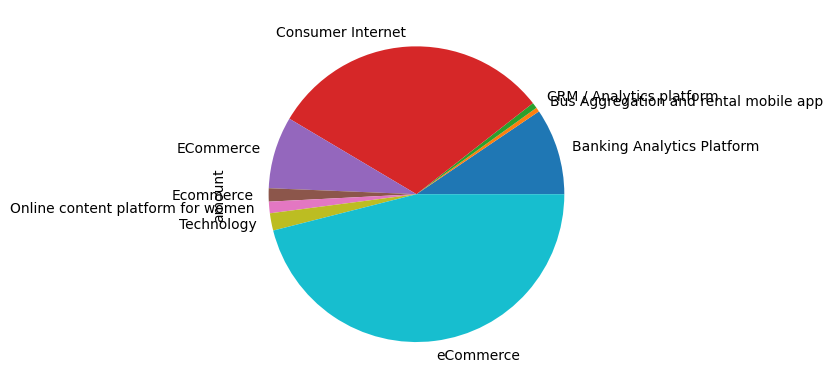

In [56]:
df[df["Investors"].str.contains("IDG Ventures")].groupby("vertical")["amount"].sum().plot(kind="pie")

In [59]:
df["year"]=df["date"].dt.year

/tmp/ipykernel_36/1666850892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"]=df["date"].dt.year


In [60]:
df.head()

,Sr No,date,startup,vertical,subvertical,city,Investors,InvestmentnType,amount,Remarks,year
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1753.000000,NaN,2020
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,160.915408,NaN,2020
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.295000,NaN,2020
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.777000,NaN,2020
6,7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1314.750000,NaN,2020


<Axes: xlabel='year'>

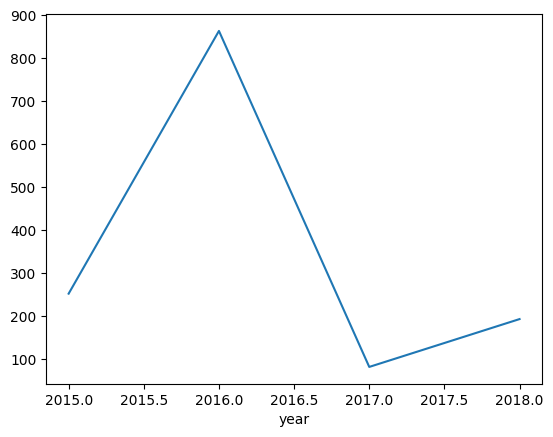

In [64]:
df[df["Investors"].str.contains("IDG Ventures")].groupby("year")["amount"].sum().plot()

In [65]:
df

,Sr No,date,startup,vertical,subvertical,city,Investors,InvestmentnType,amount,Remarks,year
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1753.000000,NaN,2020
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,160.915408,NaN,2020
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.295000,NaN,2020
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.777000,NaN,2020
6,7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1314.750000,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...
2824,2825,2015-09-04,Urban Ladder,Online Furnishing\\neCommerce,NaN,Bangalore,"Sequoia Capital, TR Capital, Steadview Capital...",Private Equity,438.250000,Series C,2015
2825,2826,2015-09-04,Purple Squirrel,Ed-Tech,NaN,Mumbai,"Matrix Partners India, India Quotient",Private Equity,0.000000,Series B,2015
2826,2827,2015-10-04,Whatfix,Interactive\\xc2\\xa0 How-To Guides,NaN,Bangalore,"Helion Venture Partner, Powerhouse Ventures, G...",Seed Funding,7.888500,NaN,2015
2827,2828,2015-10-04,iMMi Life,Mobile Health Tech,NaN,Chennai,Unitus Seed Fund,Seed Funding,0.000000,NaN,2015


In [67]:
round(df["amount"].sum())

130557

In [68]:
round(df["amount"].max())

21912

In [70]:
df[df["amount"]==21912]

,Sr No,date,startup,vertical,subvertical,city,Investors,InvestmentnType,amount,Remarks,year


In [73]:
df.groupby("startup")["amount"].max().sort_values(ascending=False).values[0]

21912.5

In [77]:
df.groupby("startup")["amount"].sum().mean() # mean means find out average

119.5575503134478

In [80]:
df["startup"].nunique()  --# ek hi baar mai number findout

1092

In [82]:
df["month"]=df["date"].dt.month

/tmp/ipykernel_36/1127954533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"]=df["date"].dt.month


In [86]:
df.groupby(["year","month"])["startup"].count().reset_index() # reset index means graph wise show data   # month wise fundind 1 month mai  36 startup

,year,month,startup
0,2015,1,36
1,2015,2,14
2,2015,3,37
3,2015,4,22
4,2015,5,23
...,...,...,...
57,2019,11,5
58,2019,12,5
59,2020,2,2
60,2020,9,2


In [90]:
temp_df=df.groupby(["year","month"])["amount"].sum().reset_index() # amount wise funding

In [91]:
temp_df["x_axis"]=temp_df["month"].astype("str")+ "-" +temp_df["year"].astype("str")

In [95]:
temp_df[["amount","x_axis"]]  #  yeh sara logic maine merge karne ke liye diya hai 

,amount,x_axis
0,5603.902750,1-2015
1,1665.008165,2-2015
2,2032.734975,3-2015
3,2066.304925,4-2015
4,873.300775,5-2015
...,...,...
57,1225.347000,11-2019
58,1310.367500,12-2019
59,42.072000,2-2020
60,1913.915408,9-2020
